<a href="https://colab.research.google.com/github/rudevico/Gachon-AISTUDY/blob/main/CNN_classification_raisin(TensorFlow).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
**Dataset: [Raisin](https://archive.ics.uci.edu/dataset/850/raisin)**  

**Framework**  
* TensorFlow: Version `2.17.0`

**Dependencies**  
* Python: Version `3.10.12`
* Numpy: Version `1.26.4`
* Pandas: Version `2.1.4`

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

%matplotlib inline

In [7]:
from google.colab import files

uploaded = files.upload()

Saving Raisin_Dataset.xlsx to Raisin_Dataset (1).xlsx


In [14]:
# load the dataset
df = pd.read_excel('./Raisin_Dataset.xlsx')
df

# 'Class'의 dtype이 object인 것이 확인됨

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [15]:
pd.unique(df['Class'])

# class의 종류는 binary로 구분 가능함을 확인

array(['Kecimen', 'Besni'], dtype=object)

In [16]:
# object dtype이던 'Kecimen', 'Besni'를 각각 0, 1에 mapping하고 변경
df['Class'] = df['Class'].map({'Kecimen': 0, 'Besni': 1})
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,0
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,1
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,1
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,1
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,1


In [19]:
# check the missing value
if df.isnull().sum().sum() == 0: # 모든 column에 대한 isnull()
    print('no missing values.')
else:
    print(df.isnull().sum()) # 각 columnn에 대한 isnull()

no missing values.


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 56.4 KB


In [ ]:
'''
| Area              |
| MajorAxisLength   |
| MinorAxisLength   |
| Eccentricity      |
| ConvexArea        |
| Extent            |
| Perimeter         |
| Class             | 건포도 종
'''

In [23]:
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636,0.500000
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315,0.500278
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000,0.000000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750,0.000000
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000,0.500000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750,1.000000
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000,1.000000


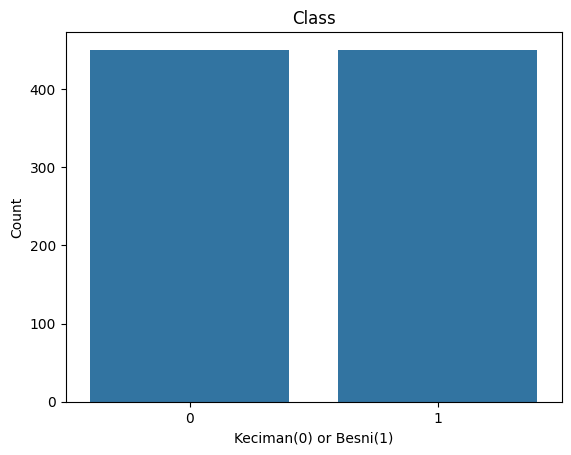

In [25]:
# check the label count - by graph
sns.countplot(data=df, x='Class')
plt.xlabel('Keciman(0) or Besni(1)')
plt.ylabel('Count')
plt.title('Class')
plt.show()

In [26]:
# check the label count - by numeric
df['Class'].value_counts()

,count
Class,
0,450
1,450


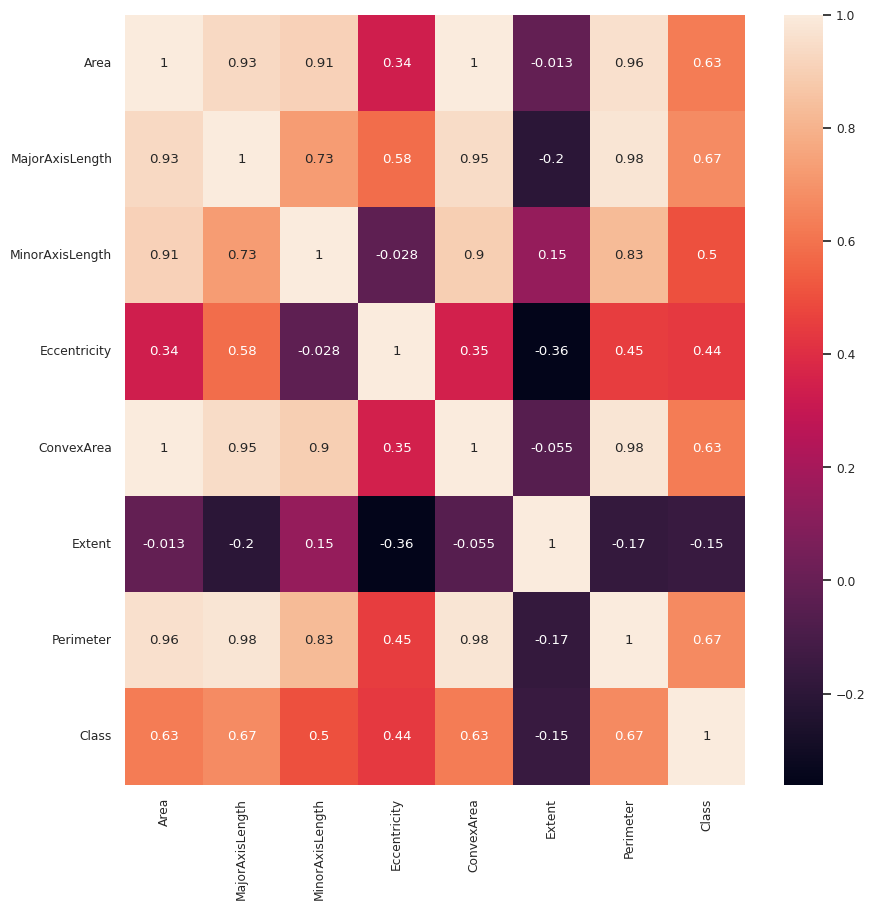

In [28]:
# check the correlations by `sns.heatmap`
# if corr >= 0.3, positive-correlated and if corr >= 0.7, high correlated
# if corr <= -0.3, negative-correlated and if corr <= -0.7, high correlated
df_corr = df.corr()

plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(data=df_corr, annot=True)
plt.show()

# positive-correlated with 'Class'
# Except for 'Extent', all features have a positive correlation with 'Class'.

<function matplotlib.pyplot.show(close=None, block=None)>

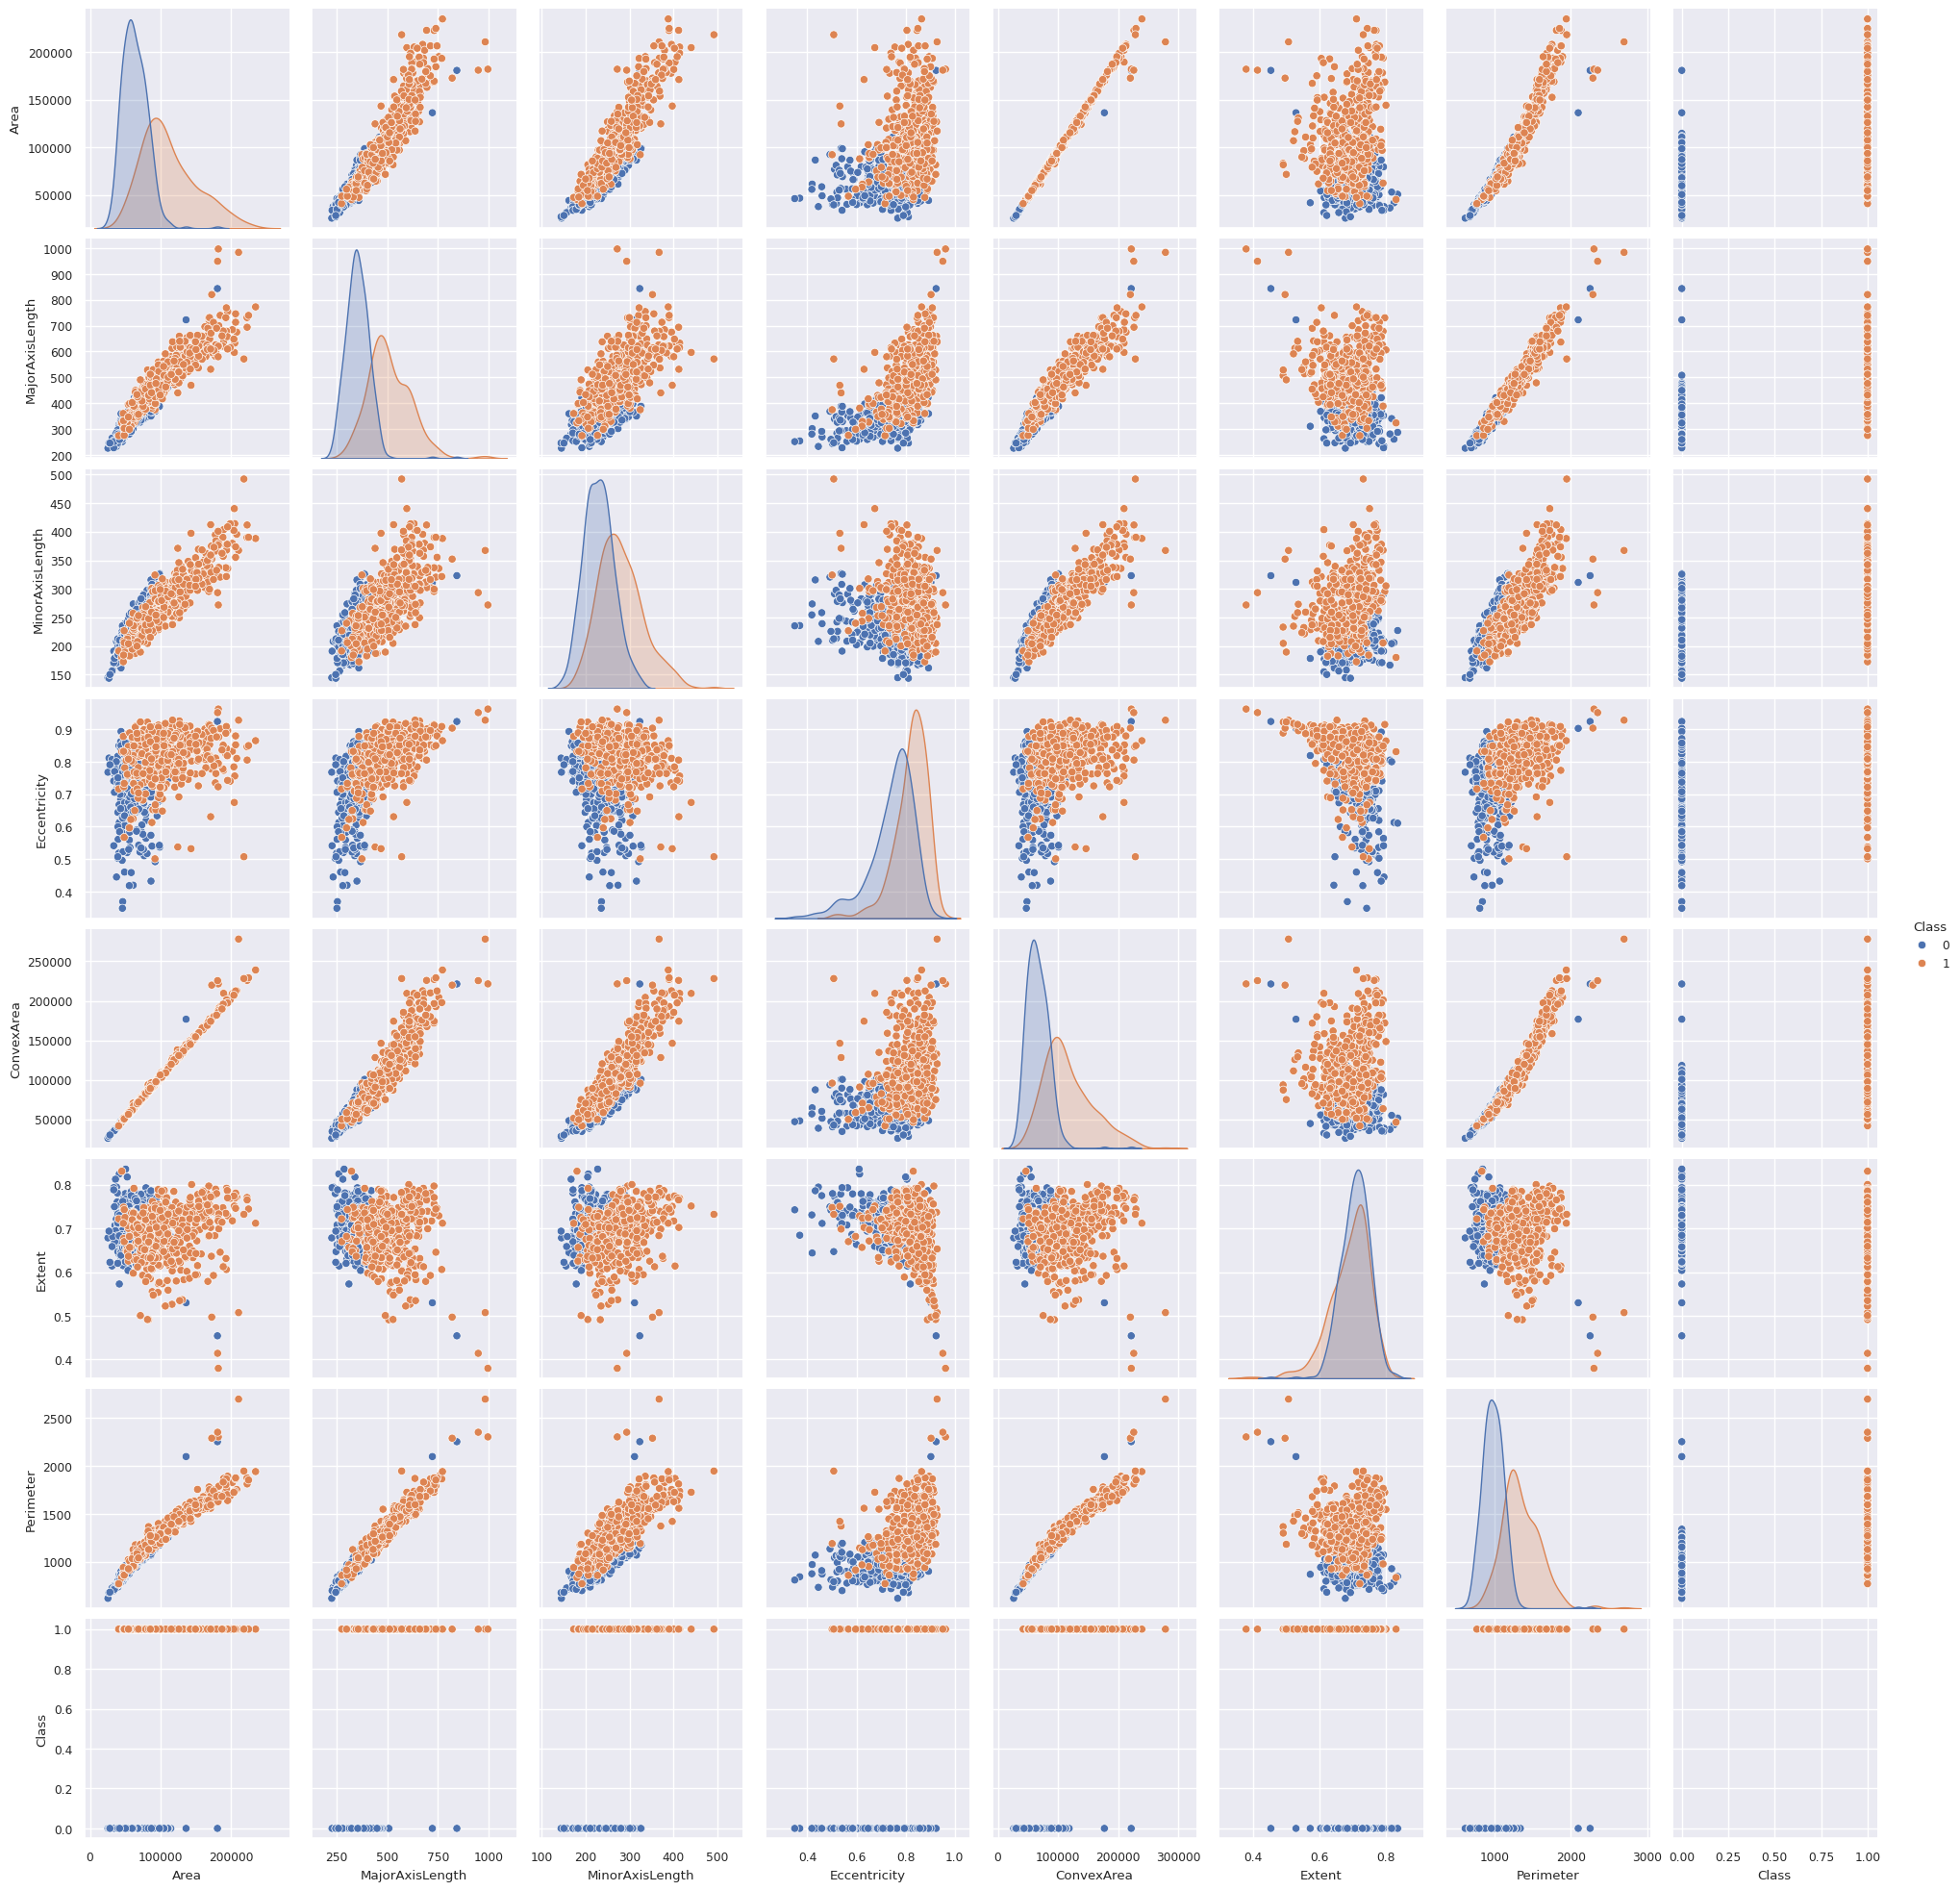

In [35]:
# check the correlations by `sns.pairplot`
sns.pairplot(data=df,
             vars=df.columns,
             hue='Class')
plt.show

In [36]:
# cf. 해당 색상들이 순서대로 부여됨 즉, blue=>label 0이고 orange=>label 1
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [37]:
X = df.drop('Class', axis=1)
X.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251


In [38]:
y = df['Class']
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

print(f'Shape: X_train {X_train.shape}, Shape: X_test {X_test.shape}')

Shape: X_train (720, 7), Shape: X_test (180, 7)


In [45]:
def split_sequences(sequences, n_steps):
    X = []
    y = []

    for i in range(len(sequences)):
        end_idx = i + n_steps
        if end_idx > len(sequences): break

        seq_x = sequences[i:end_idx, :-1] # features
        seq_y = sequences[end_idx-1, -1] # label('Class')
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [51]:
# cf. np.array()대신, .to_numpy() 사용해도 무방
# cf. np.array()는 다양한 데이터 타입에 사용 가능함
# cf. .to_numpy()는 pandas data type에 사용 가능함


# cf. X_train.shape is (720, 7) 2-dim
X_train_array = np.array(X_train) # shape is (720, 7) 2-dim
# cf. y_train.shape is (720, ) 1-dim. so, convert to 2-dim by .reshape()
y_train_array = np.array(y_train).reshape(-1, 1) # shape is (720, 1) 2-dim
train_dataset = np.c_[X_train_array, y_train_array]

X_test_array = np.array(X_test)
y_test_array = np.array(y_test).reshape(-1, 1)
test_dataset = np.c_[X_test_array, y_test_array]

print(f'train_dataset: Shape {train_dataset.shape}', end=", ")

print(f'test_dataset: Shape {test_dataset.shape}')

train_dataset: Shape (720, 8), test_dataset: Shape (180, 8)


In [56]:
# Convert to Sequential Data

# 이로 인해서 다음과 같이 model에 input이 입력될 것임
# 1st_input = idx_0_to_4,
# 2nd_input = idx_5_to_9,
# ...,
# last(716th)_input = idx_716_to_720
X_train, y_train = split_sequences(train_dataset, 5)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_dataset, 5)
print(X_test.shape, y_test.shape)

# (X_test기준)따라서 sequential한 data instances 5개를 묶은 것이 하나의 data instance로 취급
# 즉, 하나의 data instance에는 features 7짜리 5묶음이 있는 것

(716, 5, 7) (716,)
(176, 5, 7) (176,)


In [52]:
# cf. pandas data structures
print(type(X_train), type(y_train))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


**cf. `pandas.DataFrame`과 `pandas.Series`**  
[`pandas.DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)과 [`pandas.Series`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)는 pandas 라이브러리에서 제공하는 두 가지 주요 데이터 구조입니다. 이 두 타입의 차이는 다음과 같습니다:

**DataFrame**  
* **2차원 데이터 구조**: 행(row)과 열(column)로 구성되어 있습니다.
* **다양한 데이터 타입 지원**: 각 열이 서로 다른 데이터 타입을 가질 수 있습니다.
* **행과 열 이름 지정 가능**: 각 행과 열에 이름(레이블)을 지정할 수 있습니다.
* **데이터 조작**: 여러 기능을 제공하여 데이터를 쉽게 조작, 필터링, 집계할 수 있습니다.

**Series**  
* **1차원 데이터 구조**: 단일 열로 구성된 데이터 구조입니다.
* **일관된 데이터 타입**: 모든 데이터가 동일한 데이터 타입을 가집니다.
* **인덱스 지정 가능**: 각 값에 대해 인덱스를 지정할 수 있습니다.
* **데이터 조작**: DataFrame의 한 열처럼 동작하며, 다양한 연산을 지원합니다.

**cf. [numpy.c_](https://numpy.org/doc/stable/reference/generated/numpy.c_.html)**  
```python
>>> np.c_[np.array([1,2,3]), np.array([4,5,6])]
array([[1, 4],
       [2, 5],
       [3, 6]])
```  


In [61]:
# one-hot encoding
y_train_onehot = pd.get_dummies(y_train).to_numpy()
y_test_onehot = pd.get_dummies(y_test).to_numpy()

print(f'y_train_onehot: Shape {y_train_onehot.shape}', end=', ')
print(f'y_test_onehot: Shape {y_test_onehot.shape}')

y_train_onehot: Shape (716, 2), y_test_onehot: Shape (176, 2)


In [62]:
from tensorflow.keras.layers import Conv1D # Convolutional 1-Dimension
from tensorflow.keras.layers import Input
from keras.layers import Dense, Flatten, Dropout

In [63]:
# 각각 5, 7, 2
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train_onehot.shape[1]

In [64]:
input_layer = Input(shape=(n_timesteps,n_features))

# cf. kernel_size=3이라는 것은 3 x 3을 의미함
conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
flat = Flatten()(conv1)
# output layer 전에는 dense를 통과
dens = Dense(64, activation = "relu")(flat)
outputs = Dense(2, activation = "sigmoid")(dens)

model = keras.Model(input_layer, outputs)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 5, 7)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 3, 64)               │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 192)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,890 (54.26 KB)

 Trainable params: 13,890 (54.26 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
train_epochs = 30
history = model.fit(X_train, y_train_onehot, epochs=train_epochs, verbose=True,  validation_split = 0.1)

Epoch 1/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6356 - loss: 1743.8027 - val_accuracy: 0.6528 - val_loss: 1130.5563
Epoch 2/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7049 - loss: 679.2252 - val_accuracy: 0.6667 - val_loss: 420.5791
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7262 - loss: 490.4295 - val_accuracy: 0.7222 - val_loss: 645.7300
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7129 - loss: 511.0820 - val_accuracy: 0.6806 - val_loss: 626.4623
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7817 - loss: 316.3073 - val_accuracy: 0.6806 - val_loss: 369.9846
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7314 - loss: 288.5699 - val_accuracy: 0.5556 - val_loss: 1097.8931
Epoch 7/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7008 - loss: 487.5109 - val_accuracy: 0.6389 - val_loss: 616.4888
Epoch 8/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6440 - loss: 757.2846 

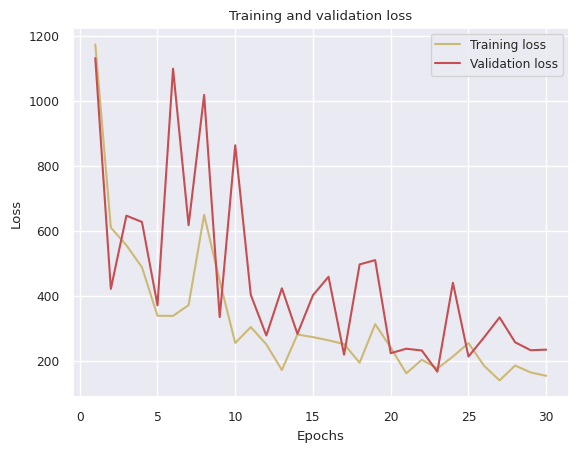

In [66]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

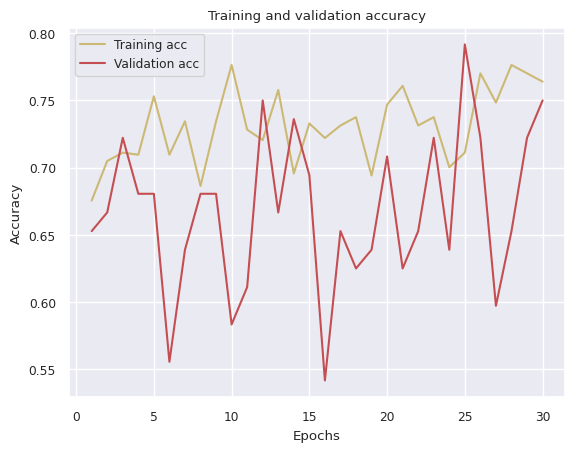

In [67]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [70]:
# Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix


y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test_onehot, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

# negative class는 잘 가려내는데, positive class는 잘 가려내지 못함

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

           0       0.60      0.97      0.74        87
           1       0.92      0.38      0.54        89

    accuracy                           0.67       176
   macro avg       0.76      0.67      0.64       176
weighted avg       0.76      0.67      0.64       176

[[84  3]
 [55 34]]
